In [1]:
import ta
import numpy as np
import pandas as pd
import random

import warnings
# Turn off all warnings
warnings.filterwarnings("ignore")

In [2]:
import ccxt
import pandas as pd
import re
import random

# Fetch OHLCV data from Kraken
def fetch_ohlcv_data(start_date, limit=None):
    exchange = ccxt.kraken()
    symbol = 'BTC/AUD'
    timeframe = '1d'
    since = exchange.parse8601(start_date)
    ohlcv_data = exchange.fetch_ohlcv(symbol, timeframe, since, limit=limit)
    
    # Convert the data to a Pandas DataFrame and set column names
    ohlcv_df = pd.DataFrame(ohlcv_data, columns=['timestamp', 'o', 'h', 'l', 'c', 'v'])
    # Convert the timestamp to a human-readable datetime format
    ohlcv_df['timestamp'] = pd.to_datetime(ohlcv_df['timestamp'], unit='ms')

    return ohlcv_df

origin_ohlcv_data = fetch_ohlcv_data("2021-01-01T00:00:00Z")

print(origin_ohlcv_data[:3])

   timestamp        o        h        l        c          v
0 2021-05-19  55101.3  55866.0  40250.0  48251.1  83.740528
1 2021-05-20  48240.4  55139.8  45531.7  52914.0  50.023423
2 2021-05-21  53207.8  54675.8  43545.6  48438.4  72.883894


In [3]:
ohlcv_data = origin_ohlcv_data.copy()

In [4]:
from ta.volatility import BollingerBands
from ta.volatility import AverageTrueRange
from ta.volatility import KeltnerChannel
from ta.volatility import DonchianChannel
from ta.momentum import RSIIndicator
from ta.momentum import StochasticOscillator
from ta.momentum import ROCIndicator
from ta.momentum import AwesomeOscillatorIndicator
from ta.momentum import KAMAIndicator
from ta.momentum import PercentagePriceOscillator
from ta.trend import SMAIndicator, MACD
from ta.trend import EMAIndicator
from ta.trend import PSARIndicator
from ta.trend import CCIIndicator
from ta.trend import ADXIndicator
from ta.trend import AroonIndicator
from ta.trend import DPOIndicator
from ta.trend import KSTIndicator
from ta.trend import MassIndex
from ta.trend import STCIndicator
from ta.trend import TRIXIndicator
from ta.trend import VortexIndicator
from ta.trend import WMAIndicator
from ta.volume import OnBalanceVolumeIndicator
from ta.volume import MFIIndicator

# TA Volatility



# TA Momentum

def awesome_oscillator(data, window1=5, window2=34):
    ao_string = f"ao_{window1}_{window2}"
    if ao_string in data.columns:
        return ao_string
    ao_indicator = AwesomeOscillatorIndicator(data['h'], data['l'], window1=window1, window2=window2)
    ao_value = ao_indicator.awesome_oscillator()
    data[ao_string] = ao_value
    return ao_string

def kama(data, window=10, pow1=2, pow2=30):
    kama_string = f"kama_{window}_{pow1}_{pow2}"
    if kama_string in data.columns:
        return kama_string
    kama_indicator = KAMAIndicator(data['c'], window=window, pow1=pow1, pow2=pow2)
    kama_value = kama_indicator.kama()
    data[kama_string] = kama_value
    return kama_string

def ppo_line(data, window_slow=26, window_fast=12, window_sign=9):
    ppo_line_string = f"ppo_line_{window_slow}_{window_fast}"
    if ppo_line_string in data.columns:
        return ppo_line_string
    ppo_indicator = PercentagePriceOscillator(data['c'], window_slow=window_slow, window_fast=window_fast)
    ppo_line_value = ppo_indicator.ppo()
    data[ppo_line_string] = ppo_line_value
    return ppo_line_string

def ppo_signal(data, window_slow=26, window_fast=12, window_sign=9):
    ppo_signal_string = f"ppo_signal_{window_slow}_{window_fast}_{window_sign}"
    if ppo_signal_string in data.columns:
        return ppo_signal_string
    ppo_indicator = PercentagePriceOscillator(data['c'], window_slow=window_slow, window_fast=window_fast, window_sign=window_sign)
    ppo_signal_value = ppo_indicator.ppo_signal()
    data[ppo_signal_string] = ppo_signal_value
    return ppo_signal_string


# 

def adx(data, adx_period=14):
    adx_string = f"adx_{adx_period}"
    if adx_string in data.columns:
        return adx_string
    adx_indicator = ADXIndicator(data['h'], data['l'], data['c'], window=adx_period)
    adx = adx_indicator.adx()
    data[adx_string] = adx
    return adx_string

def kc(data, kc_period=20):
    kc_string = f"kc_{kc_period}"
    if kc_string in data.columns:
        return kc_string
    kc_indicator = KeltnerChannel(data['h'], data['l'], data['c'], window=kc_period)
    kc_upperband = kc_indicator.keltner_channel_hband()
    kc_lowerband = kc_indicator.keltner_channel_lband()
    data[kc_string] = (data['c'] - kc_lowerband) / (kc_upperband - kc_lowerband)
    return kc_string

def dc(data, dc_period=20):
    dc_string = f"dc_{dc_period}"
    if dc_string in data.columns:
        return dc_string
    dc_indicator = DonchianChannel(data['h'], data['l'], data['c'], window=dc_period)
    dc_upperband = dc_indicator.donchian_channel_hband()
    dc_lowerband = dc_indicator.donchian_channel_lband()
    data[dc_string] = (data['c'] - dc_lowerband) / (dc_upperband - dc_lowerband)
    return dc_string

def aroon_up(data, aroon_period=25):
    aroon_up_string = f"aroon_up_{aroon_period}"
    if aroon_up_string in data.columns:
        return aroon_up_string
    aroon_indicator = AroonIndicator(data['c'], window=aroon_period)
    aroon_up = aroon_indicator.aroon_up()
    data[aroon_up_string] = aroon_up
    return aroon_up_string

def aroon_down(data, aroon_period=25):
    aroon_down_string = f"aroon_down_{aroon_period}"
    if aroon_down_string in data.columns:
        return aroon_down_string
    aroon_indicator = AroonIndicator(data['c'], window=aroon_period)
    aroon_down = aroon_indicator.aroon_down()
    data[aroon_down_string] = aroon_down
    return aroon_down_string

def dpo(data, dpo_period=20):
    dpo_string = f"dpo_{dpo_period}"
    if dpo_string in data.columns:
        return dpo_string
    dpo_indicator = DPOIndicator(data['c'], window=dpo_period)
    dpo_value = dpo_indicator.dpo()
    data[dpo_string] = dpo_value
    return dpo_string

def kst(data, r1=10, r2=15, r3=20, r4=30, n1=10, n2=10, n3=10, n4=15):
    kst_string = f"kst_{r1}_{r2}_{r3}_{r4}_{n1}_{n2}_{n3}_{n4}"
    if kst_string in data.columns:
        return kst_string
    kst_indicator = KSTIndicator(data['c'], r1, r2, r3, r4, n1, n2, n3, n4)
    kst_value = kst_indicator.kst()
    data[kst_string] = kst_value
    return kst_string

def kst_signal(data, roc1=10, roc2=15, roc3=20, roc4=30, sma1=10, sma2=10, sma3=10, sma4=15, signal=9):
    kst_sig_string = f"kst_signal_{roc1}_{roc2}_{roc3}_{roc4}_{sma1}_{sma2}_{sma3}_{sma4}_{signal}"
    if kst_sig_string in data.columns:
        return kst_sig_string
    kst_indicator = KSTIndicator(data['c'], roc1, roc2, roc3, roc4, sma1, sma2, sma3, sma4, signal)
    kst_signal = kst_indicator.kst_sig()
    data[kst_sig_string] = kst_signal
    return kst_sig_string

def trix(data, trix_period=18):
    trix_string = f"trix_{trix_period}"
    if trix_string in data.columns:
        return trix_string
    trix_indicator = TRIXIndicator(data['c'], window=trix_period)
    trix = trix_indicator.trix()
    data[trix_string] = trix
    return trix_string

def vortex_pos(data, vortex_period=14):
    vortex_pos_string = f"vortex_pos_{vortex_period}"
    if vortex_pos_string in data.columns:
        return vortex_pos_string
    vortex_indicator = VortexIndicator(data['h'], data['l'], data['c'], window=vortex_period)
    vortex_pos = vortex_indicator.vortex_indicator_pos()
    data[vortex_pos_string] = vortex_pos
    return vortex_pos_string

def vortex_neg(data, vortex_period=14):
    vortex_neg_string = f"vortex_neg_{vortex_period}"
    if vortex_neg_string in data.columns:
        return vortex_neg_string
    vortex_indicator = VortexIndicator(data['h'], data['l'], data['c'], window=vortex_period)
    vortex_neg = vortex_indicator.vortex_indicator_neg()
    data[vortex_neg_string] = vortex_neg
    return vortex_neg_string

def wma(data, wma_period=20):
    wma_string = f"wma_{wma_period}"
    if wma_string in data.columns:
        return wma_string
    wma_indicator = WMAIndicator(data['c'], window=wma_period)
    wma = wma_indicator.wma()
    data[wma_string] = wma
    return wma_string

def mass(data, window_fast=9, window_slow=25):
    mass_string = f"mass_{window_fast}_{window_slow}"
    if mass_string in data.columns:
        return mass_string
    mass_indicator = MassIndex(data['h'], data['l'], window_fast=window_fast, window_slow=window_slow)
    mass_value = mass_indicator.mass_index()
    data[mass_string] = mass_value
    return mass_string

def stc(data, window_fast=23, window_slow=50, cycle=10, smooth1=3, smooth2=3):
    stc_string = f"stc_{window_fast}_{window_slow}_{cycle}_{smooth1}_{smooth2}"
    if stc_string in data.columns:
        return stc_string
    stc_indicator = STCIndicator(data['c'], window_fast=window_fast, window_slow=window_slow, cycle=cycle, smooth1=smooth1, smooth2=smooth2)
    stc_value = stc_indicator.stc()
    data[stc_string] = stc_value
    return stc_string

def ema(data, ema_period=20):
    ema_string = f"ema_{ema_period}"
    if ema_string in data.columns:
        return ema_string
    ema_indicator = EMAIndicator(data['c'], window=ema_period)
    ema = ema_indicator.ema_indicator()
    data[ema_string] = ema
    return ema_string

def psar(data, step=0.02, max_step=0.2):
    psar_string = f"psar_{step}_{max_step}".replace('.', '_')
    if psar_string in data.columns:
        return psar_string
    psar_indicator = PSARIndicator(data['h'], data['l'], data['c'], step=step, max_step=max_step)
    psar = psar_indicator.psar()
    data[psar_string] = psar
    return psar_string

def obv(data):
    obv_string = "obv"
    if obv_string in data.columns:
        return obv_string
    obv_indicator = OnBalanceVolumeIndicator(data['c'], data['v'])
    obv = obv_indicator.on_balance_volume()
    data[obv_string] = obv
    return obv_string

def mfi(data, mfi_period=14):
    mfi_string = f"mfi_{mfi_period}"
    if mfi_string in data.columns:
        return mfi_string
    mfi_indicator = MFIIndicator(data['h'], data['l'], data['c'], data['v'], window=mfi_period)
    mfi = mfi_indicator.money_flow_index()
    data[mfi_string] = mfi
    return mfi_string

def roc(data, roc_period=12):
    roc_string = f"roc_{roc_period}"
    if roc_string in data.columns:
        return roc_string
    roc_indicator = ROCIndicator(data['c'], window=roc_period)
    roc = roc_indicator.roc()
    data[roc_string] = roc
    return roc_string

def bollinger_bands_upper(data, bollinger_period=20, bollinger_std_dev=2):
    bollinger_string = f"bollinger_upper_{bollinger_period}_{bollinger_std_dev:.2f}".replace('.', '_')
    if bollinger_string in data.columns:
        return bollinger_string
    bollinger_indicator = BollingerBands(data['c'], window=bollinger_period, window_dev=bollinger_std_dev)
    data[bollinger_string] = bollinger_indicator.bollinger_hband()
    return bollinger_string

def bollinger_bands_lower(data, bollinger_period=20, bollinger_std_dev=2):
    bollinger_string = f"bollinger_lower_{bollinger_period}_{bollinger_std_dev:.2f}".replace('.', '_')
    if bollinger_string in data.columns:
        return bollinger_string
    bollinger_indicator = BollingerBands(data['c'], window=bollinger_period, window_dev=bollinger_std_dev)
    data[bollinger_string] = bollinger_indicator.bollinger_lband()
    return bollinger_string

def stochastic_oscillator_K(data, k_period=14, d_period=3):
    stoch_k_string = f"stochastic_K_{k_period}_{d_period}"
    if stoch_k_string in data.columns:
        return stoch_k_string
    stoch_indicator = StochasticOscillator(data['h'], data['l'], data['c'], k_period, d_period)
    data[stoch_k_string] = stoch_indicator.stoch()
    return stoch_k_string

def stochastic_oscillator_D(data, k_period=14, d_period=3):
    stoch_d_string = f"stochastic_D_{k_period}_{d_period}"
    if stoch_d_string in data.columns:
        return stoch_d_string
    stoch_indicator = StochasticOscillator(data['h'], data['l'], data['c'], k_period, d_period)
    data[stoch_d_string] = stoch_indicator.stoch_signal()
    return stoch_d_string

def atr(data, atr_period=14):
    atr_string = f"atr_{atr_period}"
    if atr_string in data.columns:
        return atr_string
    atr_indicator = AverageTrueRange(data['h'], data['l'], data['c'], window=atr_period)
    data[atr_string] = atr_indicator.average_true_range()
    return atr_string

def rsi(data, rsi_period = 14):
    rsi_string = f"rsi_{rsi_period}"
    if rsi_string in data.columns:
        return rsi_string
    rsi_indicator = RSIIndicator(data['c'], window=rsi_period)
    rsi = rsi_indicator.rsi()
    data[rsi_string] = rsi
    return rsi_string

def sma(data, sma_period=20):
    sma_string = f"sma_{sma_period}"
    if sma_string in data.columns:
        return sma_string
    sma_indicator = SMAIndicator(data['c'], window=sma_period)
    sma = sma_indicator.sma_indicator()
    data[sma_string] = sma
    return sma_string

def macd(data, macd_fast=12, macd_slow=26, macd_signal=9):
    macd_string = f"macd_{macd_fast}_{macd_slow}_{macd_signal}"
    if macd_string in data.columns:
        return macd_string
    macd_indicator = MACD(ohlcv_data['c'], macd_fast, macd_slow, macd_signal)
    macd = macd_indicator.macd()  # MACD line
    data[macd_string] = macd
    return macd_string

def macd_signal(data, macd_fast=12, macd_slow=26, macd_signal=9):
    macd_sig_string = f"macd_signal_{macd_fast}_{macd_slow}_{macd_signal}"
    if macd_sig_string in data.columns:
        return macd_sig_string
    macd_indicator = MACD(ohlcv_data['c'], macd_fast, macd_slow, macd_signal)
    macd_sig = macd_indicator.macd_signal()  # Signal line
    data[macd_sig_string] = macd_sig
    return macd_sig_string

def macd_histogram(data, macd_fast=12, macd_slow=26, macd_signal=9):
    macd_hist_string = f"macd_histogram_{macd_fast}_{macd_slow}_{macd_signal}"
    if macd_hist_string in data.columns:
        return macd_hist_string
    macd_indicator = MACD(data['c'], macd_fast, macd_slow, macd_signal)
    macd_hist = macd_indicator.macd_diff()  
    data[macd_hist_string] = macd_hist
    return macd_hist_string

def cci(data, cci_period=20):
    cci_string = f"cci_{cci_period}"
    if cci_string in data.columns:
        return cci_string
    cci_indicator = CCIIndicator(data['h'], data['l'], data['c'], window=cci_period)
    cci = cci_indicator.cci()
    data[cci_string] = cci
    return cci_string

def constant(data, constant=30):
    const_string = f"constant_{constant}".replace('.', '_')
    if const_string in data.columns:
        return const_string
    data[const_string] = constant
    return const_string


def candle(data,candle ="o"):
    return candle

In [6]:
class Value():
    def __init__(self):
        random_macd_choice = random.choice([[12, 26, 9], [24, 52, 18]])
        stochastic_oscillator_values = [random.randint(10, 20), random.randint(3, 5)]
        bollinger_bands_values = [random.randint(20, 40), round(random.uniform(1.5, 2.5), 2)]
        aroon_values = [random.randint(14, 28)]
        kst_values = [random.randint(10, 20), random.randint(15, 25), random.randint(20, 30), random.randint(30, 40)]
        vortex_values = [random.randint(10, 30)]
        random_stc_parameters = [random.randint(20, 40), random.randint(40, 60), random.randint(5, 15), random.randint(2, 5), random.randint(2, 5)]
        ppo_window = [random.choice([24, 26, 28, 30]), random.choice([10, 12, 14]), random.choice([7, 9, 11])]
        self.values = [
            # Trend Indicators
            ([adx, [random.randint(10, 30)]], [constant, [25]]),
            ([aroon_up, aroon_values], [aroon_down, aroon_values]),
            ([dpo, [random.randint(14, 28)]], [constant, [0]]),
            ([kst, kst_values], [kst_signal, kst_values]),
            ([mass, [random.randint(7, 15), random.randint(20, 40)]], [constant, [30]]),
            ([stc, random_stc_parameters], [constant, [50]]),
            ([trix, [random.randint(14, 28)]], [constant, [0]]),
            ([vortex_pos, vortex_values], [vortex_neg, vortex_values]),
            ([wma, [random.randint(20, 40)]], [candle, 'o']),
            ([ema, [random.randint(20, 40)]], [candle, 'o']),
            ([cci, [random.randint(20, 40)]], [constant, [100]]),            
            ([constant, [0]], [macd_histogram, random_macd_choice]),
            ([psar, [round(random.uniform(0.01, 0.03), 2), round(random.uniform(0.1, 0.3), 2)]], [candle, 'o']),
            ([sma, [random.randint(20, 40)]], [candle, 'o']),
            ([macd, random_macd_choice], [macd_signal, random_macd_choice]),
            # Volatility Indicators
            ([kc, [random.randint(10, 30)]], [constant, [round(random.uniform(0.2, 1.0), 2)]]), # kc is typically between 0 and 1
            ([dc, [random.randint(10, 30)]], [constant, [round(random.uniform(0.2, 1.0), 2)]]), # dc is typyically between 0 and 1
            ([atr, [random.randint(10, 20)]], [candle, 'h']), 
            ([bollinger_bands_lower, bollinger_bands_values], [bollinger_bands_upper, bollinger_bands_values]),
            # Momentum Indicators
            ([constant, [30]], [rsi, [random.randint(14, 28)]]), # Less than orientation? Doesn't make sense for buy
            ([rsi, [random.randint(14, 28)]], [constant, [70]]), # Correct orientation, Doesn't make sense for sell
            ([constant, [20]], [stochastic_oscillator_K, stochastic_oscillator_values]),
            ([stochastic_oscillator_D, stochastic_oscillator_values], [constant, [80]]),
            ([roc, [random.randint(10, 20)]], [constant, [0]]),  # compares to a `0`? `value > c × value` => `roc(10-20) > c * 0`. Needs fixing
            ([awesome_oscillator, [random.choice([4, 5, 6, 7]), random.choice([30, 32, 34, 36, 38])]], [constant, [0]]),
            ([kama, [random.choice([8, 10, 12, 14]), random.choice([2, 3, 4]), random.choice([25, 30, 35])]], [candle, 'c']),
            ([ppo_line, ppo_window], [ppo_signal, ppo_window]),
            # Volume Indicators
            ([obv, []], [constant, [0]]), # compares to a `0`? `value > c × value` => `obv() > c * 0`. Needs fixing
            ([mfi, [random.randint(10, 20)]], [constant, [100]]),            
        ]
        self.indicator = random.choice(self.values)
        self.column_name_1 = self.indicator[0][0](ohlcv_data, *self.indicator[0][1])
        self.column_name_2 = self.indicator[1][0](ohlcv_data, *self.indicator[1][1])

    def evaluate(self,time):
        return f'ohlcv_data.{self.column_name_1}.iloc[{time}]', f'ohlcv_data.{self.column_name_2}.iloc[{time}]'
    
    # Regenerates one of the indicators
    def mutate(self):
        self.indicator = random.choice(self.values)
        if random.random() < 0.5:
            self.column_name_1 = self.indicator[0][0](ohlcv_data, *self.indicator[0][1])
        else:
            self.column_name_2 = self.indicator[1][0](ohlcv_data, *self.indicator[1][1])

    def __str__(self):
        return f'{self.column_name_1}, {self.column_name_2}'

class Literal():
    def __init__(self):
        self.negated = random.choice([True, False])
        self.value = Value()
        self.c = random.uniform(0.9, 1.1)

    def evaluate(self,time):
        val1, val2 = self.value.evaluate(time)
        if self.negated:
            return f'not({val1} > {self.c:.2f} * {val2})'
        return f'({val1} > {self.c:.2f} * {val2})'
    
    # Regenerates the values and negated status of the literal if we have reached depth, 
    # or passes the mutation down to self.value
    def mutate(self, depth):
        depth -= 1
        if depth == 0:
            self.negated = random.choice([True, False])
            self.value = Value()
        else:
            self.value.mutate()

    def __str__(self):
        if self.negated:
            return f'¬({self.value.column_name_1} > {self.c:.2f} * {self.value.column_name_2})'
        return f'({self.value.column_name_1} > {self.c:.2f} * {self.value.column_name_2})'

class Conjugate():
    def __init__(self):
        self.literals = []
        self.generate_lit()

    def generate_lit(self):
        rand_num = random.random()
        if rand_num < 0.2:
            self.literals.append(Literal())
            self.generate_lit()
            return
        self.literals.append(Literal())
        return 
    
    def evaluate(self,time):
        out_str =""
        for literal in self.literals:
            out_str += f"{literal.evaluate(time)} and "
        return out_str[:-5]
    
    # Regenerates a literal if we have reached depth, or passes the mutation down to a literal
    def mutate(self, depth):
        which_lit = random.randint(0, len(self.literals) - 1)
        depth -= 1
        if depth == 0:
            self.literals[which_lit] = Literal()
        else:
            self.literals[which_lit].mutate(depth)

    def __str__(self):
        out_str =""
        for literal in self.literals:
            out_str += f"{literal.__str__()} ∧ "
        return out_str[:-3]
        
class Gene:
    def __init__(self) -> None:
        self.sell_conjugates = []
        self.buy_conjugates = []
        self.generate_buy_conjugates()
        self.generate_sell_conjugates()
    
    def generate_buy_conjugates(self):
        rand_num = random.random()
        if rand_num < 0.1:
            self.buy_conjugates.append(Conjugate())
            self.generate_buy_conjugates()
            return
        self.buy_conjugates.append(Conjugate())
        return

    def generate_sell_conjugates(self):
        rand_num = random.random()
        if rand_num < 0.1:
            self.sell_conjugates.append(Conjugate())
            self.generate_sell_conjugates()
            return
        self.sell_conjugates.append(Conjugate())
        return

    def evaluate_buy(self,time):
        out_str =""
        for conjugate in self.buy_conjugates:
            out_str += f"({conjugate.evaluate(time)}) or "
        return eval(out_str[:-4])

    def evaluate_sell(self,time):
        out_str =""
        for conjugate in self.sell_conjugates:
            out_str += f"({conjugate.evaluate(time)}) or "
        return eval(out_str[:-4])
    
    def count_literals(self):
        literal_count = 0
        for buy_conjugate in self.buy_conjugates:
            literal_count += len(buy_conjugate.literals)
        for sell_conjugate in self.sell_conjugates:
            literal_count += len(sell_conjugate.literals)
        return literal_count
    
    def update_weights(self, weights):
        if len(weights) != self.count_literals():
            raise ValueError("The number of weights provided does not match the number of literals in the gene.")
        weight_index = 0
        for buy_conjugate in self.buy_conjugates:
            for literal in buy_conjugate.literals:
                literal.c = weights[weight_index]
                weight_index += 1
        for sell_conjugate in self.sell_conjugates:
            for literal in sell_conjugate.literals:
                literal.c = weights[weight_index]
                weight_index += 1
                
    # Mutates the gene
    def mutate(self):
        depth = random.randint(1, 4) # Randomly chooses how deep into the gene we will mutate
        
        # Mutate a buy_conjugate
        if random.random() < 0.5:     
            which_conj = random.randint(0, len(self.buy_conjugates) - 1)
            depth -= 1
            if depth == 0:
                self.buy_conjugates[which_conj] = Conjugate()
            else:
                self.buy_conjugates[which_conj].mutate(depth)
              
        # Mutate a sell conjugate
        else:
            which_conj = random.randint(0, len(self.sell_conjugates) - 1)
            depth -= 1
            if depth == 0:
                self.sell_conjugates[which_conj] = Conjugate()
            else:
                self.sell_conjugates[which_conj].mutate(depth)

    def __str__(self):
        out_str ="BUY CONDITIONS: "
        for conjugate in self.buy_conjugates:
            out_str += f"({conjugate.__str__()}) ∨ "
        out_str = out_str[:-3]
        out_str += "\nSELL CONDITIONS: "
        for conjugate in self.sell_conjugates:
            out_str += f"({conjugate.__str__()}) ∨ "
        out_str = out_str[:-3]
        return out_str
    
ohlcv_data = origin_ohlcv_data.copy()
a = Gene()
print(a)
print(a.evaluate_buy(0))
print(a.evaluate_sell(0))

BUY CONDITIONS: ((obv > 0.93 * constant_0))
SELL CONDITIONS: ((wma_33 > 0.91 * o))
True
False


In [7]:
def trading_bot(gene, ohlcv_data, from_day=0, to_day=719):
    #n = len(ohlcv_data[from_day:to_day]) # wrong
    positions = []
    fiat_money = 100
    btc_money = 0
    fee = 0.02 # Each buy or sell event costs 2% of current holdings.

    for t in range(from_day, to_day):
        close_price = ohlcv_data.loc[t, 'c']      

        if (gene.evaluate_buy(t)) and (not gene.evaluate_buy(t-1)) and (not gene.evaluate_sell(t) and not gene.evaluate_sell(t-1)):
            positions.append(('buy', t))
            if(fiat_money > 0):
                btc_money = (fiat_money / close_price) * (1 - fee)
                fiat_money = 0
                #print(btc_money * close_price)
            
        elif (gene.evaluate_sell(t)) and (not gene.evaluate_sell(t-1)) and (not gene.evaluate_buy(t) and not gene.evaluate_buy(t-1)):
            positions.append(('sell', t))
            if(btc_money > 0):
                fiat_money = (btc_money * close_price) * (1 - fee)
                btc_money = 0
                #print(fiat_money)
    
    if len(positions) > 0:
        if positions[-1][0] == "buy":
            if(to_day==719):
                positions.append(('sell', 719))
                if(btc_money > 0):
                    fiat_money = (btc_money * close_price) * (1 - fee)
                    btc_money = 0
    else:
        #print("Fail")
        pass
        #fiat_money = 0 ## We didn't trade, so pretend result is 0

    return positions, fiat_money, btc_money
    
#ohlcv_data = origin_ohlcv_data.copy()
a = Gene()
print(a)
pos, fiat, btc = trading_bot(a, ohlcv_data)
print(pos)
if fiat == 0:
    print("Bust")
elif fiat == 100:
    print("No trades")
else:
    print(fiat)    

BUY CONDITIONS: (¬(aroon_up_20 > 0.95 * aroon_down_20) ∧ ¬(bollinger_lower_37_1_71 > 1.05 * bollinger_upper_37_1_71))
SELL CONDITIONS: (¬(trix_16 > 1.04 * constant_0))
[('buy', 111), ('buy', 168), ('buy', 183), ('buy', 278), ('buy', 326), ('buy', 457), ('buy', 521), ('buy', 538), ('buy', 631), ('buy', 656), ('buy', 702), ('sell', 719)]
64.05974933679481


In [8]:
import copy
import numpy as np

class Genome:
    def __init__(self, fitness, genes):
        self.fitness = fitness
        self.genes = genes

class Optimization():
    def __init__(self, population_size, generations, ohlcv_data, gene, to_day):
        self.population_size = population_size
        self.generations = generations
        self.ohlcv_data = ohlcv_data
        self.gene = gene
        self.num_literals = gene.count_literals()
        self.to_day = to_day # How many days the data is trained on

    def train(self):
        no_improvement = 0
        mutation_rate = 0.05
        population = self.initialize_population(self.population_size, self.num_literals)
        best_genome = population[0]
        # Evaluate the population
        for i in range(self.generations):
            population = self.evaluate_population(population)
            # Sort the population by fitness
            population.sort(key=lambda x: x.fitness, reverse=True)
            # # Keep track of the best genome
            print(f"Generation {i} best genome fitness: {population[0].fitness}, average fitness: {np.mean([x.fitness for x in population])}")
            # Bad DNF
            if(population[0].fitness <= 100):
                print("Top Fitness <= 100: Quitting")
                return population[0]
            if i > 0 and population[0].fitness == best_genome.fitness:
                no_improvement += 1
            else:
                no_improvement = 0
            # Update the mutation rate
            if no_improvement > 4:
                mutation_rate *= 1.1
            else:
                mutation_rate = 0.05
            best_genome = population[0]
            # 
            if no_improvement == 10:
                print("No improvement for 10 generations: Quitting")
                return best_genome
            # Do tournament selection for next generation
            population = self.tournament_selection(population, 0.05, 2, mutation_rate)
            population.sort(key=lambda x: x.fitness, reverse=True)
        return best_genome

    def initialize_population(self, population_size, num_literals):
        population = []
        for i in range(population_size):
            genes = np.random.uniform(1, 1, num_literals) ## genes = np.random.uniform(0, 1, num_literals)
            population.append(Genome(0, genes))
        return population
    
    def evaluate_population(self, population):
        for genome in population:
            genome.fitness = self.fitness(genome)
        return population
    
    def fitness(self, weights):
        self.gene.update_weights(weights.genes)
        positions, fiat_money, btc_money = trading_bot(self.gene, ohlcv_data, to_day=self.to_day)
        return fiat_money + (btc_money * ohlcv_data.iloc[-1]['c'])	
    
    def tournament_selection(self, population, elitism, tournament_size, mutation_rate):
        # Select elite
        elite = population[:int(elitism * len(population))]
        # Initialize an empty list for the parents
        parents = []
        for _ in range(len(population) - len(elite)):
            # Randomly select tournament_size genomes
            tournament = np.random.choice(population, size=tournament_size)
            # Select the best genome
            winner = copy.deepcopy(max(tournament, key=lambda x: x.fitness))
            # Apply mutation to winner.genes
            for i in range(winner.genes.size):
                mutation = np.random.uniform(-mutation_rate, mutation_rate)
                winner.genes[i] = max(0, winner.genes[i] + mutation)
            # Add the winner to the parents list
            parents.append(winner)
        # Add the elite to the parents list
        parents.extend(elite)
        return parents

In [9]:
## Hard Reset (removes data collected from the code block below)
ohlcv_data = origin_ohlcv_data.copy()

In [18]:
# Performs tournament selection using reproduction and mutation on the logical expressions
class GeneticAlgorithm:
    def __init__(self, genome_size, to_day, data=ohlcv_data):
        self.data = data
        self.to_day = to_day
        self.gene_list = []
        
        # Randomly generates our initial population
        for i in range(genome_size):
            self.gene_list.append(Gene())
            
        # Reproduction or mutation is randomly chosen after each tournament selection for each surviving gene
        while len(self.gene_list) > 1:
            self.gene_list = self.tournament_selection(self.gene_list)
            for gene in self.gene_list:
                self.gene_list.remove(gene)
                m_gene = self.mutate(copy.deepcopy(gene))
                if self.fitness(m_gene, self.data) >= self.fitness(gene, self.data):
                    print(f"Mutated Gene Wins: {self.fitness(m_gene, self.data)} > {self.fitness(gene, self.data)}")
                    self.gene_list.append(m_gene)
                else:
                    self.gene_list.append(gene)
                    print(f"Unmutated Gene Wins: {self.fitness(gene, self.data)} > {self.fitness(m_gene, self.data)}")
        
                


                #self.gene_list.append(gene)
            
        # The final gene and its fitness
        print(self.gene_list[0])
        print(self.fitness(self.gene_list[0], self.data))
        
    # Pits each gene against one other gene, 
    # whichever has a better fitness is propogated to the next generation
    def tournament_selection(self, gene_list):
        next_generation = []
        
        for _ in range(len(gene_list) // 2):
            
            # Pick out two random genes and remove them from the pool
            first_gene = random.choice(gene_list)
            gene_list.remove(first_gene)
            second_gene = random.choice(gene_list)
            gene_list.remove(second_gene)
            
            # Only occurs if the current gene population has an odd number of genes, 
            # if so then one of the surviving genes has to face the odd gene
            if len(gene_list) == 1:
                if self.fitness(first_gene, self.data) < self.fitness(second_gene, self.data):
                    first_gene = second_gene
                    
                second_gene = random.choice(gene_list)
                    
            # Determine which gene moves on
            if self.fitness(first_gene, self.data) >= self.fitness(second_gene, self.data):
                next_generation.append(first_gene)
            else:
                next_generation.append(second_gene)
        
        return next_generation
        
    # Determines fitness of a gene
    def fitness(self, gene, data):
        positions, fiat_money, btc_money = trading_bot(gene, data, to_day=self.to_day)
        return fiat_money + (btc_money * data.iloc[-1]['c'])
    
    # Nothing happens to the gene
    def reproduce(self, gene):
        print('Reproducing!')
        return gene
    
    # Gene is mutated, check the mutation method in the Gene class
    def mutate(self, gene):
        #print('Mutating!\n', gene)
        gene.mutate()
        print(gene)
        return gene

In [19]:
temp = GeneticAlgorithm(500, 200, ohlcv_data)

BUY CONDITIONS: ((kama_10_2_35 > 1.02 * c))
SELL CONDITIONS: ((mfi_10 > 0.94 * constant_100))
Unmutated Gene Wins: 100.0 > 81.71867563769624
BUY CONDITIONS: ((rsi_20 > 0.94 * constant_70)) ∨ (¬(wma_36 > 0.93 * o))
SELL CONDITIONS: ((atr_14 > 0.96 * h))
Unmutated Gene Wins: 116.77750905859399 > 84.48991629206381
BUY CONDITIONS: ((roc_16 > 1.08 * constant_0))
SELL CONDITIONS: ((dpo_19 > 1.03 * constant_0))
Mutated Gene Wins: 111.61727610993658 > 92.70982410484426
BUY CONDITIONS: ((constant_20 > 0.95 * stochastic_K_15_4))
SELL CONDITIONS: (¬(sma_30 > 0.99 * o))
Unmutated Gene Wins: 85.42219195591365 > 63.122195441233416
BUY CONDITIONS: (¬(bollinger_lower_22_1_59 > 1.07 * c))
SELL CONDITIONS: (¬(vortex_pos_15 > 0.95 * vortex_neg_15))
Mutated Gene Wins: 100.0 > 100.0
BUY CONDITIONS: ((mass_10_37 > 1.08 * constant_30))
SELL CONDITIONS: ((aroon_up_21 > 1.04 * aroon_down_21))
Mutated Gene Wins: 100.0 > 100.0
BUY CONDITIONS: (¬(constant_20 > 1.02 * stochastic_K_12_3) ∧ (constant_0 > 0.99 * macd

In [135]:


geneList = []
goodGeneList = []
best_fitness = 0
best_gene = None
for x in range(0, 150):
    newGene = Gene()
    geneList.append(newGene)
    print(newGene)
    optimization = Optimization(population_size=70, generations=1, ohlcv_data=ohlcv_data, gene=newGene, to_day=200)
    best_genome = optimization.train()
    newGene.update_weights(best_genome.genes)
    positions, fiat_money, btc_money = trading_bot(newGene, ohlcv_data, from_day=200, to_day=719)
    if(fiat_money > 100): # Validation
        goodGeneList.append(newGene)
        print(f"Final DNF Expression: ")
        print(optimization.gene)
        print("Best genome:", best_genome.genes)
        print("Best genome fitness:", best_genome.fitness)
        if(best_genome.fitness > best_fitness):
            best_fitness = best_genome.fitness
            best_gene = newGene


BUY CONDITIONS: ((vortex_pos_27 > 1.02 * vortex_neg_27))
SELL CONDITIONS: ((aroon_up_25 > 1.06 * aroon_down_25)) ∨ ((aroon_up_15 > 0.97 * aroon_down_15))
Generation 0 best genome fitness: 121.95712433220898, average fitness: 121.957124332209
Final DNF Expression: 
BUY CONDITIONS: ((vortex_pos_27 > 1.00 * vortex_neg_27))
SELL CONDITIONS: ((aroon_up_25 > 1.00 * aroon_down_25)) ∨ ((aroon_up_15 > 1.00 * aroon_down_15))
Best genome: [1. 1. 1.]
Best genome fitness: 121.95712433220898
BUY CONDITIONS: ((aroon_up_21 > 1.10 * aroon_down_21))
SELL CONDITIONS: (¬(atr_17 > 0.96 * h))
Generation 0 best genome fitness: 100.0, average fitness: 100.0
Top Fitness <= 100: Quitting
BUY CONDITIONS: ((ao_7_34 > 0.91 * constant_0))
SELL CONDITIONS: ((kc_12 > 1.03 * constant_0_43))
Generation 0 best genome fitness: 100.0, average fitness: 100.0
Top Fitness <= 100: Quitting
BUY CONDITIONS: ((ema_37 > 1.04 * o)) ∨ (¬(trix_17 > 1.07 * constant_0))
SELL CONDITIONS: ((bollinger_lower_25_2_30 > 1.07 * bollinger_upp

In [136]:
# Take the genes that passed validation and optimize them more
# This probably makes the genes overfit for the first 200 days
# Just a thought.

toBeOptimizedFurtherGenes = copy.deepcopy(goodGeneList)

for x in toBeOptimizedFurtherGenes:
    optimization = Optimization(population_size=200, generations=20, ohlcv_data=ohlcv_data, gene=x, to_day=200)
    best_genome = optimization.train()
    x.update_weights(best_genome.genes)
    positions, fiat_money, btc_money = trading_bot(x, ohlcv_data, from_day=200, to_day=719)
    print(f"Final DNF Expression: ")
    print(optimization.gene)
    print("Best genome:", best_genome.genes)
    print("Best genome fitness:", best_genome.fitness)
       

Generation 0 best genome fitness: 121.95712433220898, average fitness: 121.95712433220895
Generation 1 best genome fitness: 139.67566620195183, average fitness: 100.8488210467904
Generation 2 best genome fitness: 139.67566620195183, average fitness: 108.99670644666061
Generation 3 best genome fitness: 139.67566620195183, average fitness: 118.23612594388429
Generation 4 best genome fitness: 139.67566620195183, average fitness: 123.69157372064346
Generation 5 best genome fitness: 139.67566620195183, average fitness: 129.49772276565628
Generation 6 best genome fitness: 139.67566620195183, average fitness: 128.12347650373178
Generation 7 best genome fitness: 139.67566620195183, average fitness: 129.06152347041774
Generation 8 best genome fitness: 139.67566620195183, average fitness: 127.91631023376368
Generation 9 best genome fitness: 139.67566620195183, average fitness: 127.01731817012296
Generation 10 best genome fitness: 139.67566620195183, average fitness: 125.98371974285638
Generation

In [139]:
goodgenecount=0
optimizedcount=0

for i, _ in enumerate(goodGeneList):
    positions, good_fiat_money, btc_money = trading_bot(goodGeneList[i], ohlcv_data, from_day=200, to_day=719)
    positions, optimized_fiat_money, btc_money = trading_bot(toBeOptimizedFurtherGenes[i], ohlcv_data, from_day=200, to_day=719)

    if good_fiat_money > optimized_fiat_money:
        print(f"goodGeneList[{i}] has the better performing gene with a fiat_money value of {good_fiat_money}")
        goodgenecount +=1
    else:
        print(f"toBeOptimizedFurtherGenes[{i}] has the better performing gene with a fiat_money value of {optimized_fiat_money}")
        optimizedcount +=1
        
print(f"goodGeneList has {goodgenecount} better performing genes.")
print(f"toBeOptimizedFurtherGenes has {optimizedcount} better performing genes.")


goodGeneList[0] has the better performing gene with a fiat_money value of 120.90490986176926
toBeOptimizedFurtherGenes[1] has the better performing gene with a fiat_money value of 101.35767883665503
toBeOptimizedFurtherGenes[2] has the better performing gene with a fiat_money value of 142.64402542565583
toBeOptimizedFurtherGenes[3] has the better performing gene with a fiat_money value of 108.03659930333443
toBeOptimizedFurtherGenes[4] has the better performing gene with a fiat_money value of 113.57210125662132
goodGeneList[5] has the better performing gene with a fiat_money value of 125.59954203099727
toBeOptimizedFurtherGenes[6] has the better performing gene with a fiat_money value of 129.803967650532
toBeOptimizedFurtherGenes[7] has the better performing gene with a fiat_money value of 126.10782514924858
toBeOptimizedFurtherGenes[8] has the better performing gene with a fiat_money value of 124.8264604950285
toBeOptimizedFurtherGenes[9] has the better performing gene with a fiat_mon

In [137]:
## Does further optimization work? spoiler:no
for i, x in enumerate(goodGeneList):
    positions, fiat_money, btc_money = trading_bot(x, ohlcv_data, from_day=0, to_day=719)
    print(f"{i}: {fiat_money}")
    print(x)
print()
print(f"Further Optimized:")
for i, x in enumerate(toBeOptimizedFurtherGenes):
    positions, fiat_money, btc_money = trading_bot(x, ohlcv_data, from_day=0, to_day=719)
    print(f"{i}: {fiat_money}")
    print(x)


0: 147.4521512438631
BUY CONDITIONS: ((vortex_pos_27 > 1.00 * vortex_neg_27))
SELL CONDITIONS: ((aroon_up_25 > 1.00 * aroon_down_25)) ∨ ((aroon_up_15 > 1.00 * aroon_down_15))
1: 101.35767883665503
BUY CONDITIONS: ((constant_30 > 1.00 * rsi_27))
SELL CONDITIONS: (¬(dpo_18 > 1.00 * constant_0))
2: 126.53294115445992
BUY CONDITIONS: ((adx_11 > 1.00 * constant_25))
SELL CONDITIONS: (¬(kc_30 > 1.00 * constant_0_65))
3: 115.41094095701641
BUY CONDITIONS: (¬(vortex_pos_22 > 1.00 * vortex_neg_22))
SELL CONDITIONS: ((ema_37 > 1.00 * o))
4: 68.9910909920911
BUY CONDITIONS: ((constant_0 > 1.00 * macd_histogram_24_52_18))
SELL CONDITIONS: ((obv > 1.00 * constant_0))
5: 178.87581736229603
BUY CONDITIONS: ((rsi_23 > 1.00 * constant_70)) ∨ (¬(trix_28 > 1.00 * constant_0))
SELL CONDITIONS: ((kama_12_3_30 > 1.00 * c) ∧ (obv > 1.00 * constant_0))
6: 163.81261429686708
BUY CONDITIONS: (¬(constant_0 > 1.00 * macd_histogram_12_26_9) ∧ (adx_19 > 1.00 * constant_25))
SELL CONDITIONS: (¬(ao_6_34 > 1.00 * cons

105.14941245578821


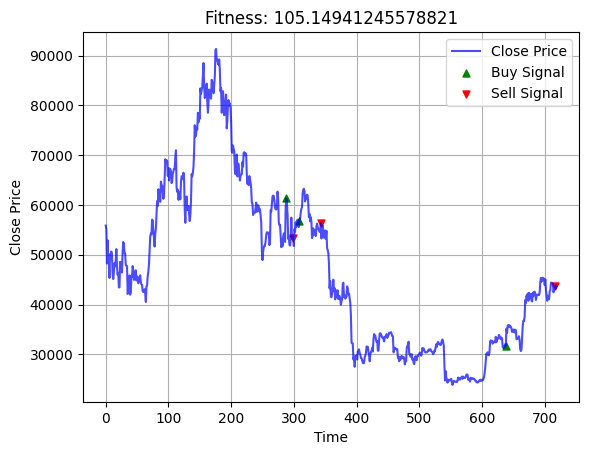

101.35767883665503


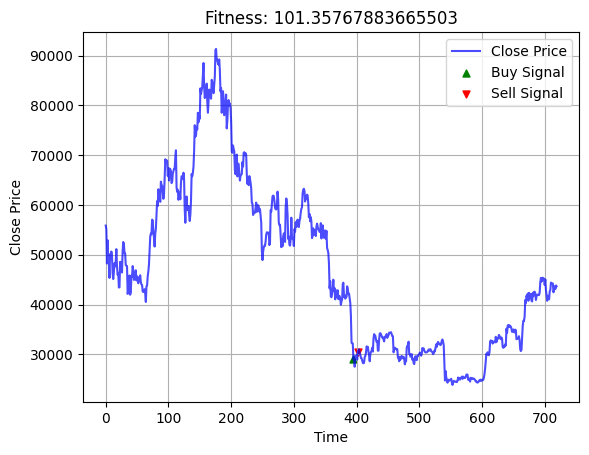

142.64402542565583


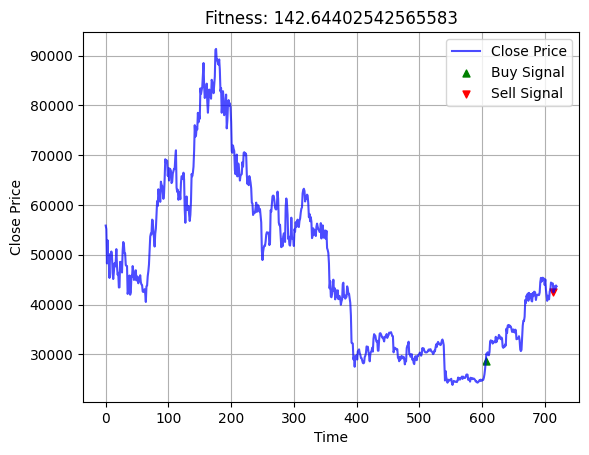

108.03659930333443


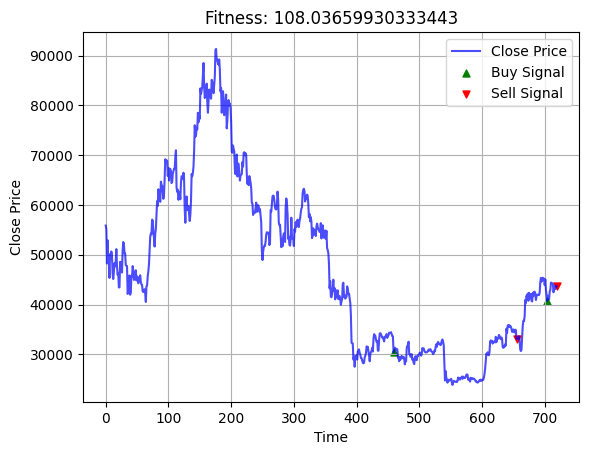

113.57210125662132


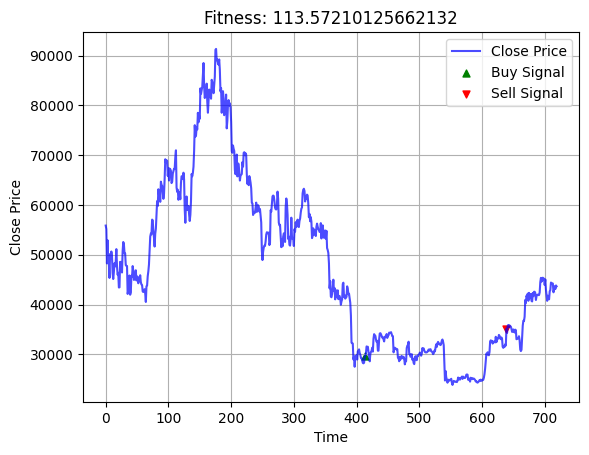

122.07882170192333


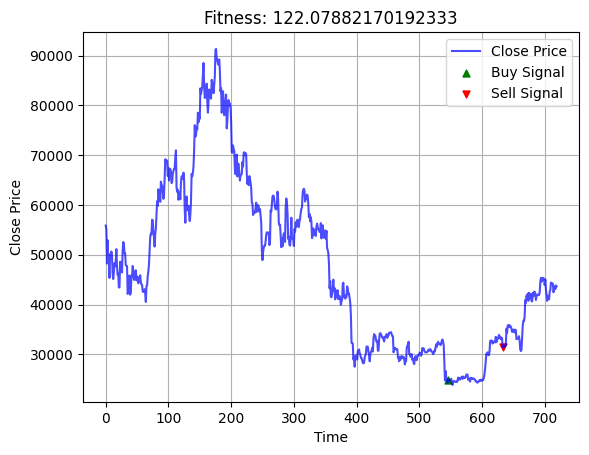

129.803967650532


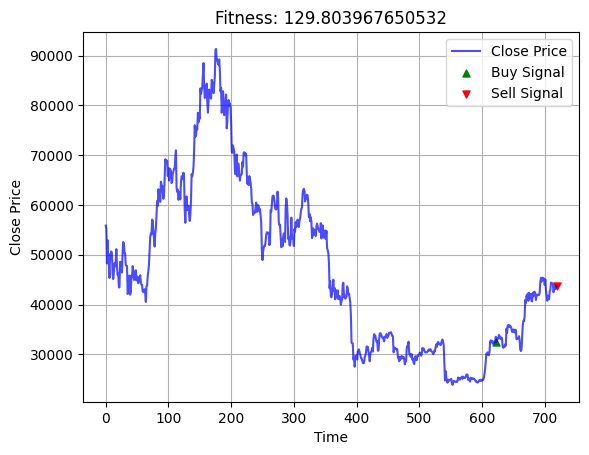

126.10782514924858


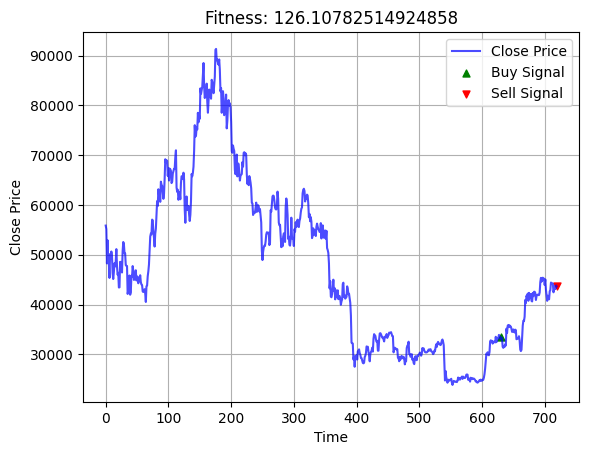

124.8264604950285


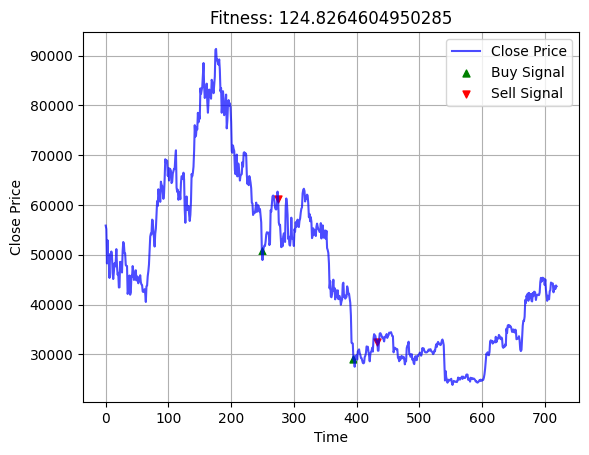

100.45068694458448


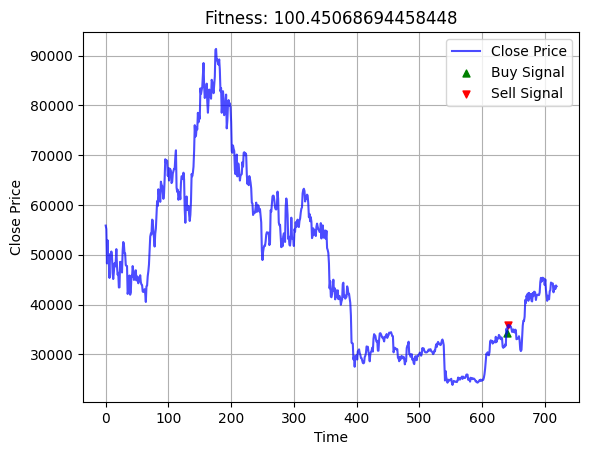

125.17642337871628


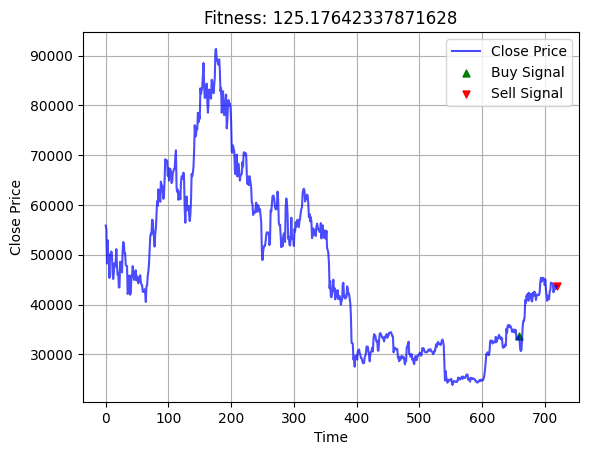

89.41019274373107


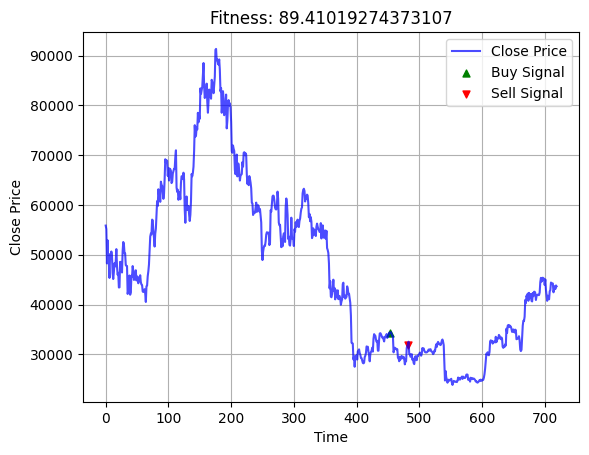

125.92582405535767


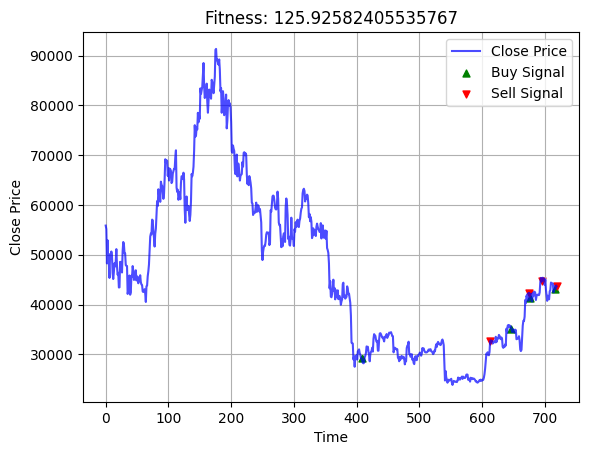

107.58496987946097


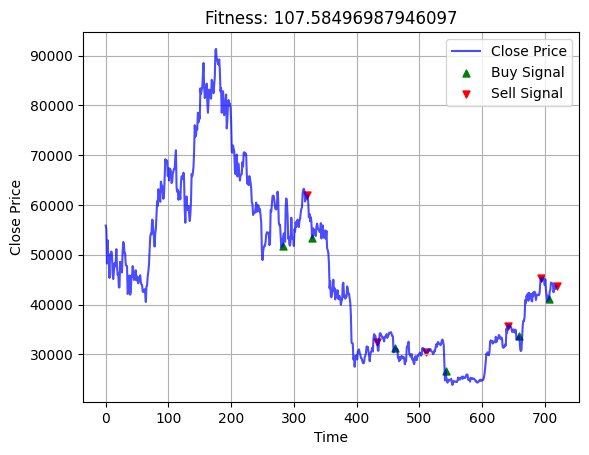

115.1237374141968


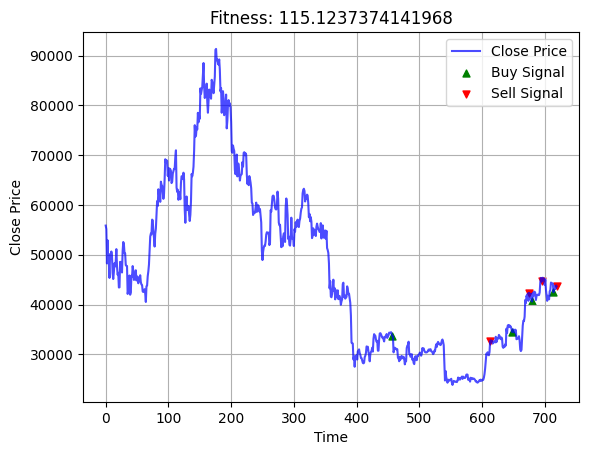

117.82701486981563


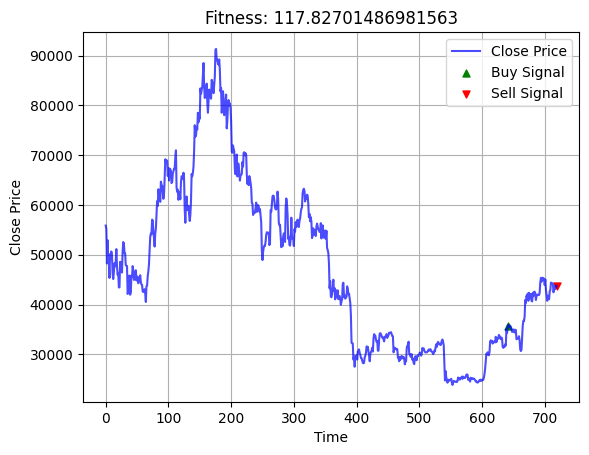

142.28547272223383


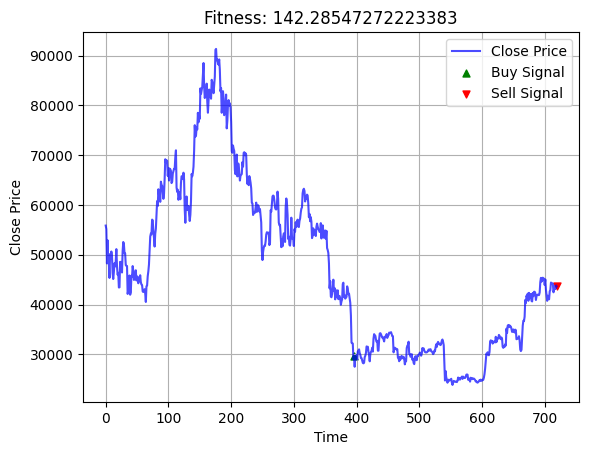

100.45889327421887


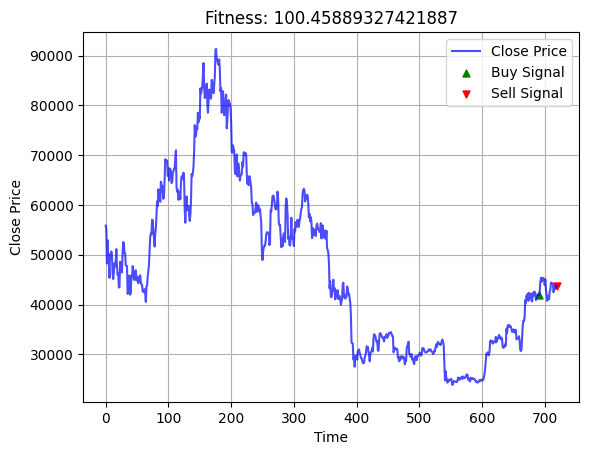

124.85396203585158


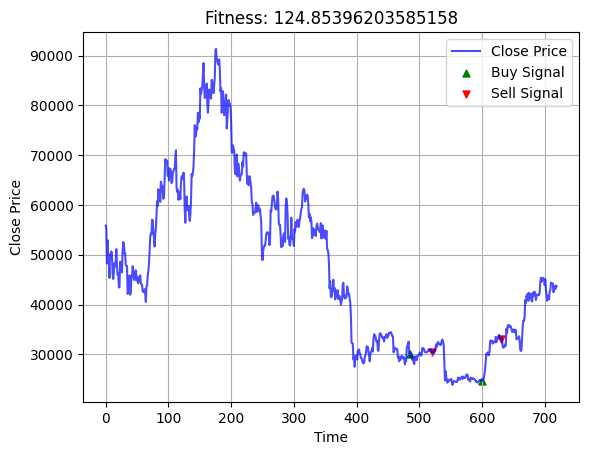

100.04251326028897


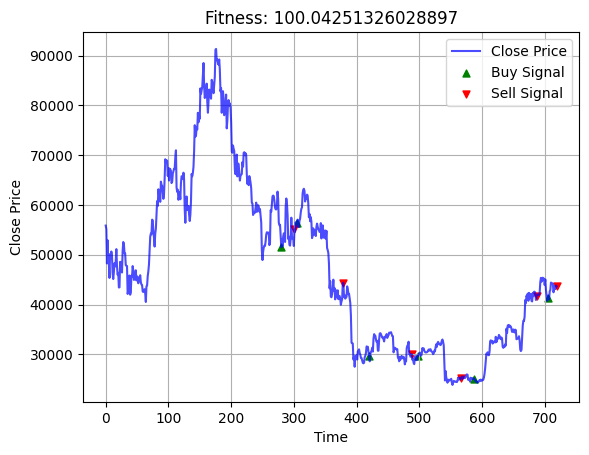

134.68808143452884


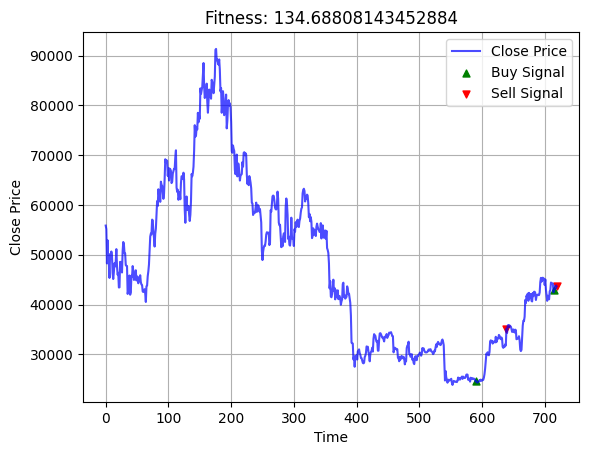

141.68021861307236


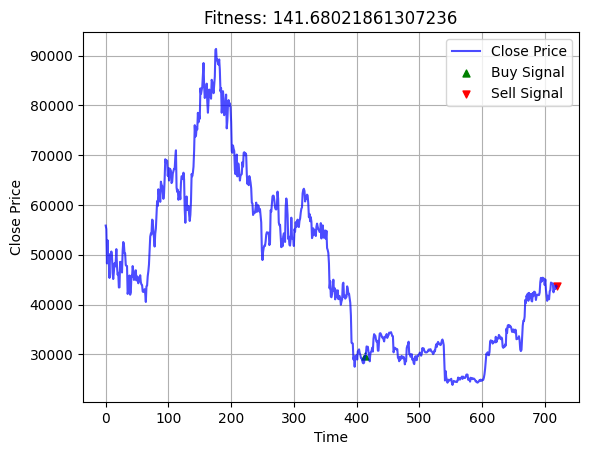

129.803967650532


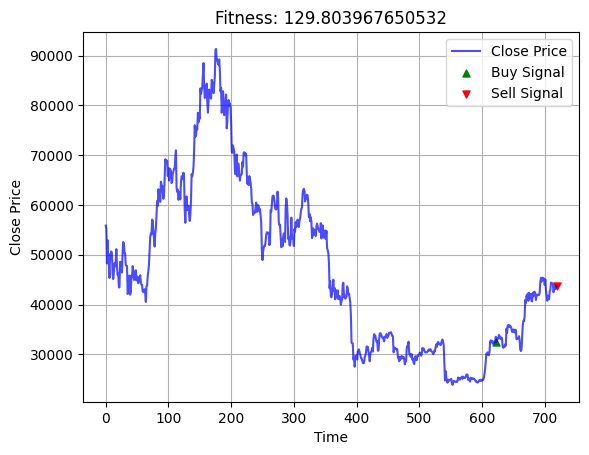

116.78358548809258


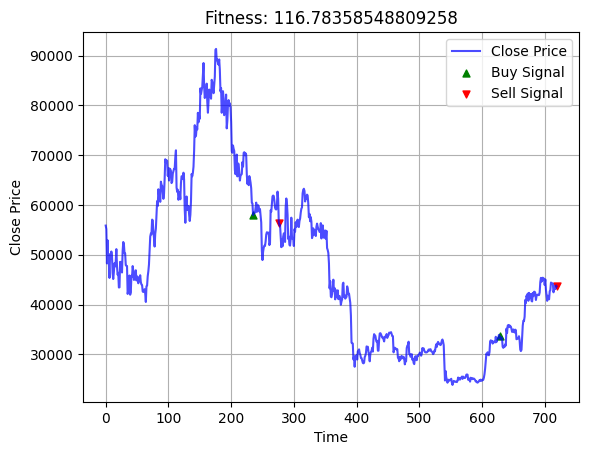

122.70426390050683


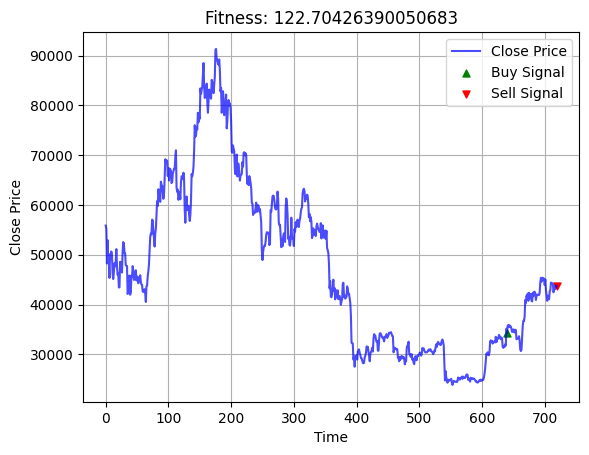

102.77696118354211


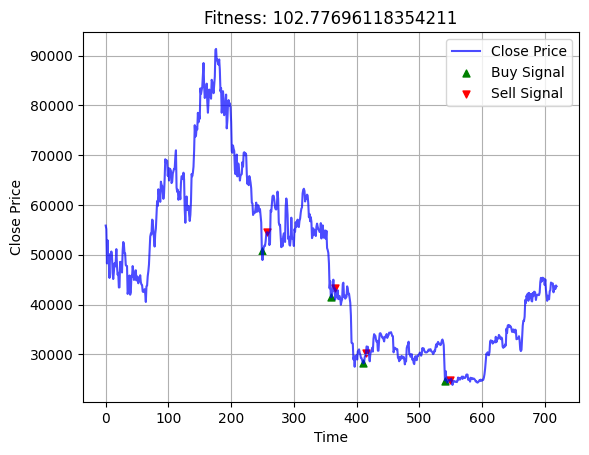

117.48954989656896


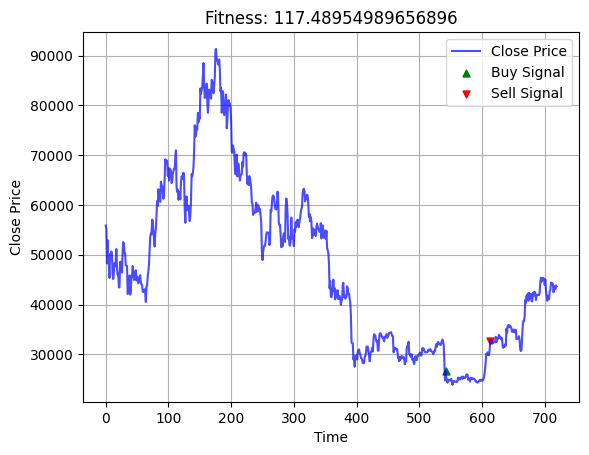

In [142]:
def numberOfEvents(positions):
    while len(positions) > 0 and positions[0][0] == 'sell':
        positions.pop(0)
    if len(positions) > 0:
        trimmed = [positions[0]]
        for i in range(1, len(positions)):
            if positions[i][0] != positions[i-1][0]:
                trimmed.append(positions[i])
    else:
        return positions
    return trimmed

for gene in toBeOptimizedFurtherGenes:
    positions, fiat_money, btc_money = trading_bot(gene, ohlcv_data, from_day=200, to_day=719)
    #print(positions)
    positions = numberOfEvents(positions)



    print(fiat_money + (btc_money * ohlcv_data.iloc[-1]['c']))
    import matplotlib.pyplot as plt

    # Extract the timestamps, close prices, and buy/sell signals
    timestamps = ohlcv_data.index
    close_prices = ohlcv_data['c']
    buy_signals = [t for action, t in positions if action == 'buy']
    sell_signals = [t for action, t in positions if action == 'sell']

    # Plot the price data
    plt.plot(timestamps, close_prices, label='Close Price', color='blue', alpha=0.7)

    # Plot the buy signals
    plt.scatter([timestamps[t] for t in buy_signals],
                [close_prices[t] for t in buy_signals],
                color='g', s=25, marker="^", label='Buy Signal')

    # Plot the sell signals
    plt.scatter([timestamps[t] for t in sell_signals],
                [close_prices[t] for t in sell_signals],
                color='r', s=25, marker="v", label='Sell Signal')

    # Customize the plot appearance

    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title(f"Fitness: {fiat_money}")
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()